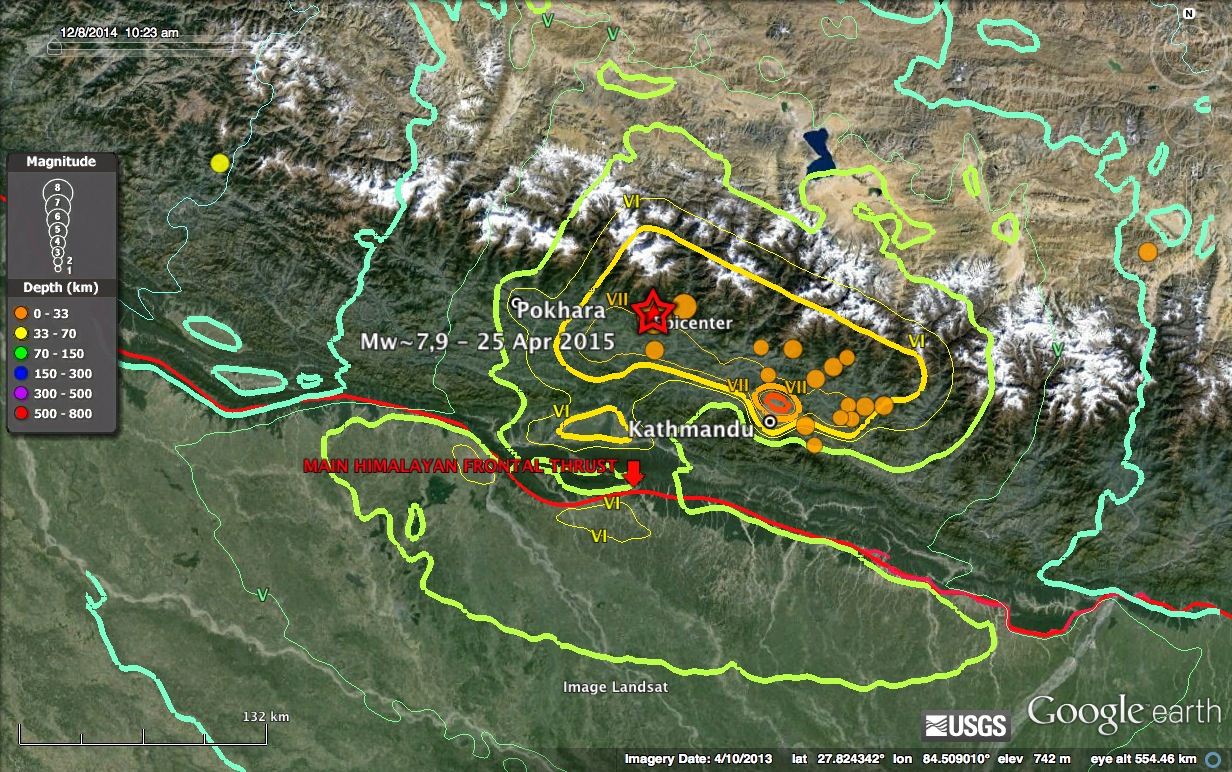

# Nepal Earthquake Tweet Analysis


##### On April 25th 2015, just before noon, Nepal experienced an earthquake of magnitude 7.8 on the moment magnitude scale. The earthquake ripped through Kathmandu valley, and a series of aftershocks leveled entire villages.

##### Immediately after the earthquake, volunteers from around the world were instrumental in guiding emergency operations, using satellite imagery to identify infrastructure destruction throughout the region.

##### People on the ground in Nepal were also generating tremendous amounts of information which could be of use to rescue operations, albeit less directly: on twitter. Between April 25th and May 28th, 33,610 tweets were tweeted by people in Nepal. These tweets were full of useful information, but 33,610 tweets is simply too many for a rescue operation to comb through.

##### However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity and resource availability. Hence, automated Machine Learning techniques are needed to identify the tweets that talk about the need of resources or availability of resources.

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
data = pd.read_csv('train.csv')

In [148]:
data.head()

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [149]:
data.tail()

,TweetClass,TweetID,TweetText
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [150]:
data.shape

(18233, 3)

In [151]:
data.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


In [153]:
data.describe()

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [154]:
data.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

In [155]:
data['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

In [156]:
data.sum().duplicated()

TweetClass    False
TweetID       False
dtype: bool

In [157]:
dupli=data.duplicated()
type(dupli)


pandas.core.series.Series

In [158]:
irrelevant_data=data[data['TweetClass']==0] 
print(irrelevant_data.shape)

(17370, 3)


In [159]:
available_data=data[data['TweetClass']==2]  
print(available_data.shape)

(664, 3)


In [160]:
need_data=data[data['TweetClass']==1]  
print(need_data.shape)

(199, 3)


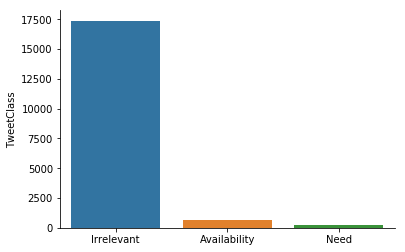

In [161]:
sns.barplot(x = ["Irrelevant", 'Availability','Need'], y = data['TweetClass'].value_counts(), data = data)
sns.despine()

In [162]:
x=data['TweetText']
y=data['TweetClass']

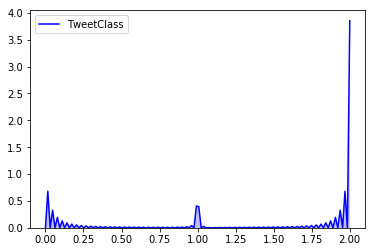

In [163]:
#kde plot
sns.kdeplot(data = data.TweetClass , color = 'blue' , shade = True , kernel = 'gau' , legend = True)

In [164]:
from sklearn.feature_extraction.text import CountVectorizer

#Transform irrelavant tweets from text to DTM
irrelevant_vect=CountVectorizer(stop_words='english')
need_vect=CountVectorizer(stop_words='english')
available_vect=CountVectorizer(stop_words='english')
irrelevant_dtm=irrelevant_vect.fit_transform(irrelevant_data['TweetText'].values.astype('U'))
need_dtm=need_vect.fit_transform(need_data['TweetText'].values.astype('U'))
available_dtm=available_vect.fit_transform(available_data['TweetText'].values.astype('U'))

In [165]:
irrelevant_word=irrelevant_vect.get_feature_names()
irrelevant_freqs=irrelevant_dtm.sum(axis=0).A1
irrelevant_result=dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

16451


In [166]:
need_word=need_vect.get_feature_names()
need_freqs=need_dtm.sum(axis=0).A1
need_result=dict(zip(need_word,need_freqs))
print(len(need_word))

755


In [167]:
available_word=available_vect.get_feature_names()
available_freqs=available_dtm.sum(axis=0).A1
available_result=dict(zip(available_word,available_freqs))
print(len(available_word))

1581


In [168]:
from wordcloud import WordCloud

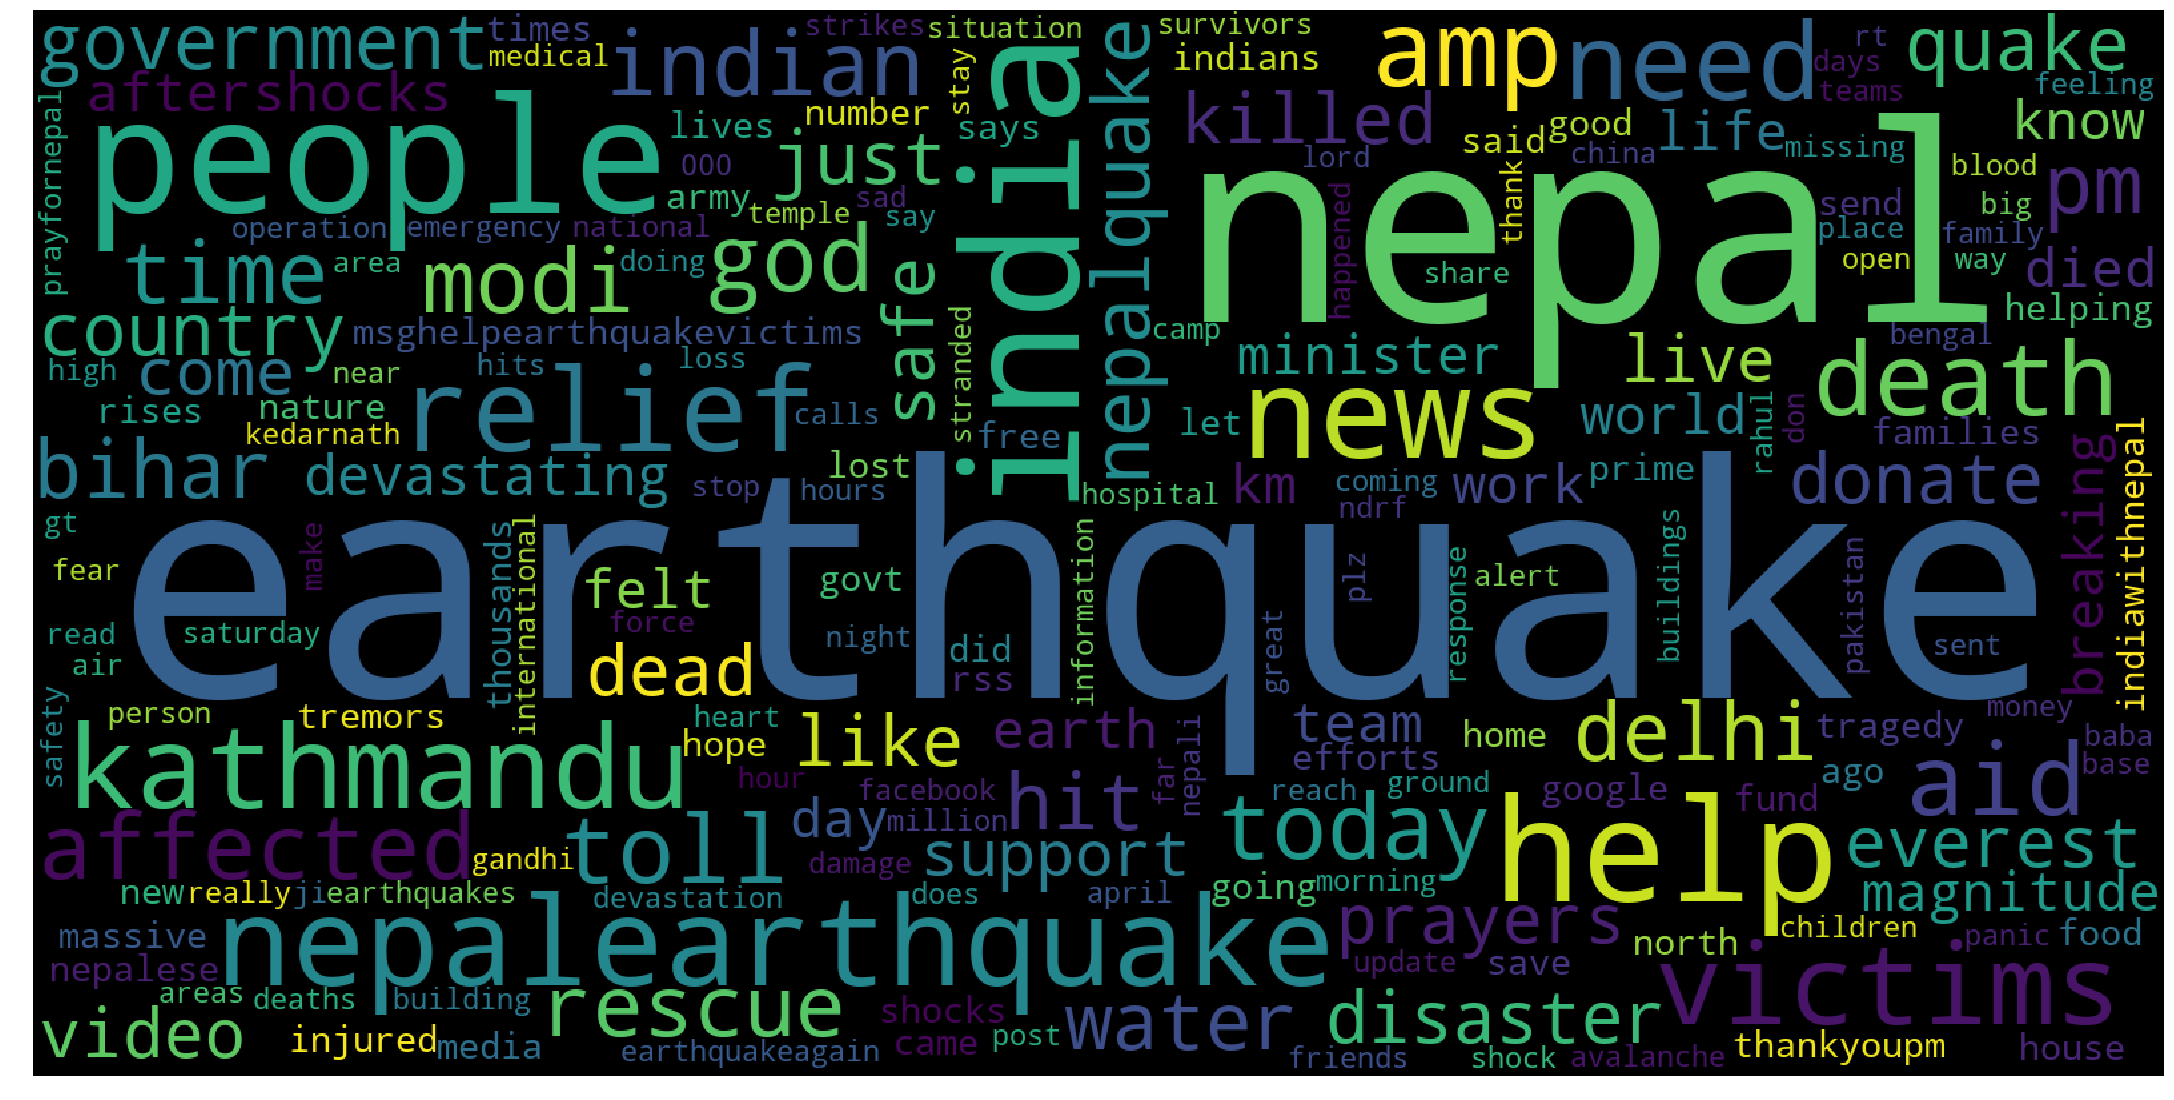

In [169]:
#Generating wordcloud of irrelavant tweet words
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(irrelevant_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("irrelevant_wordcloud.png")
plt.show()

In [170]:
irrelevant_data.head()

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


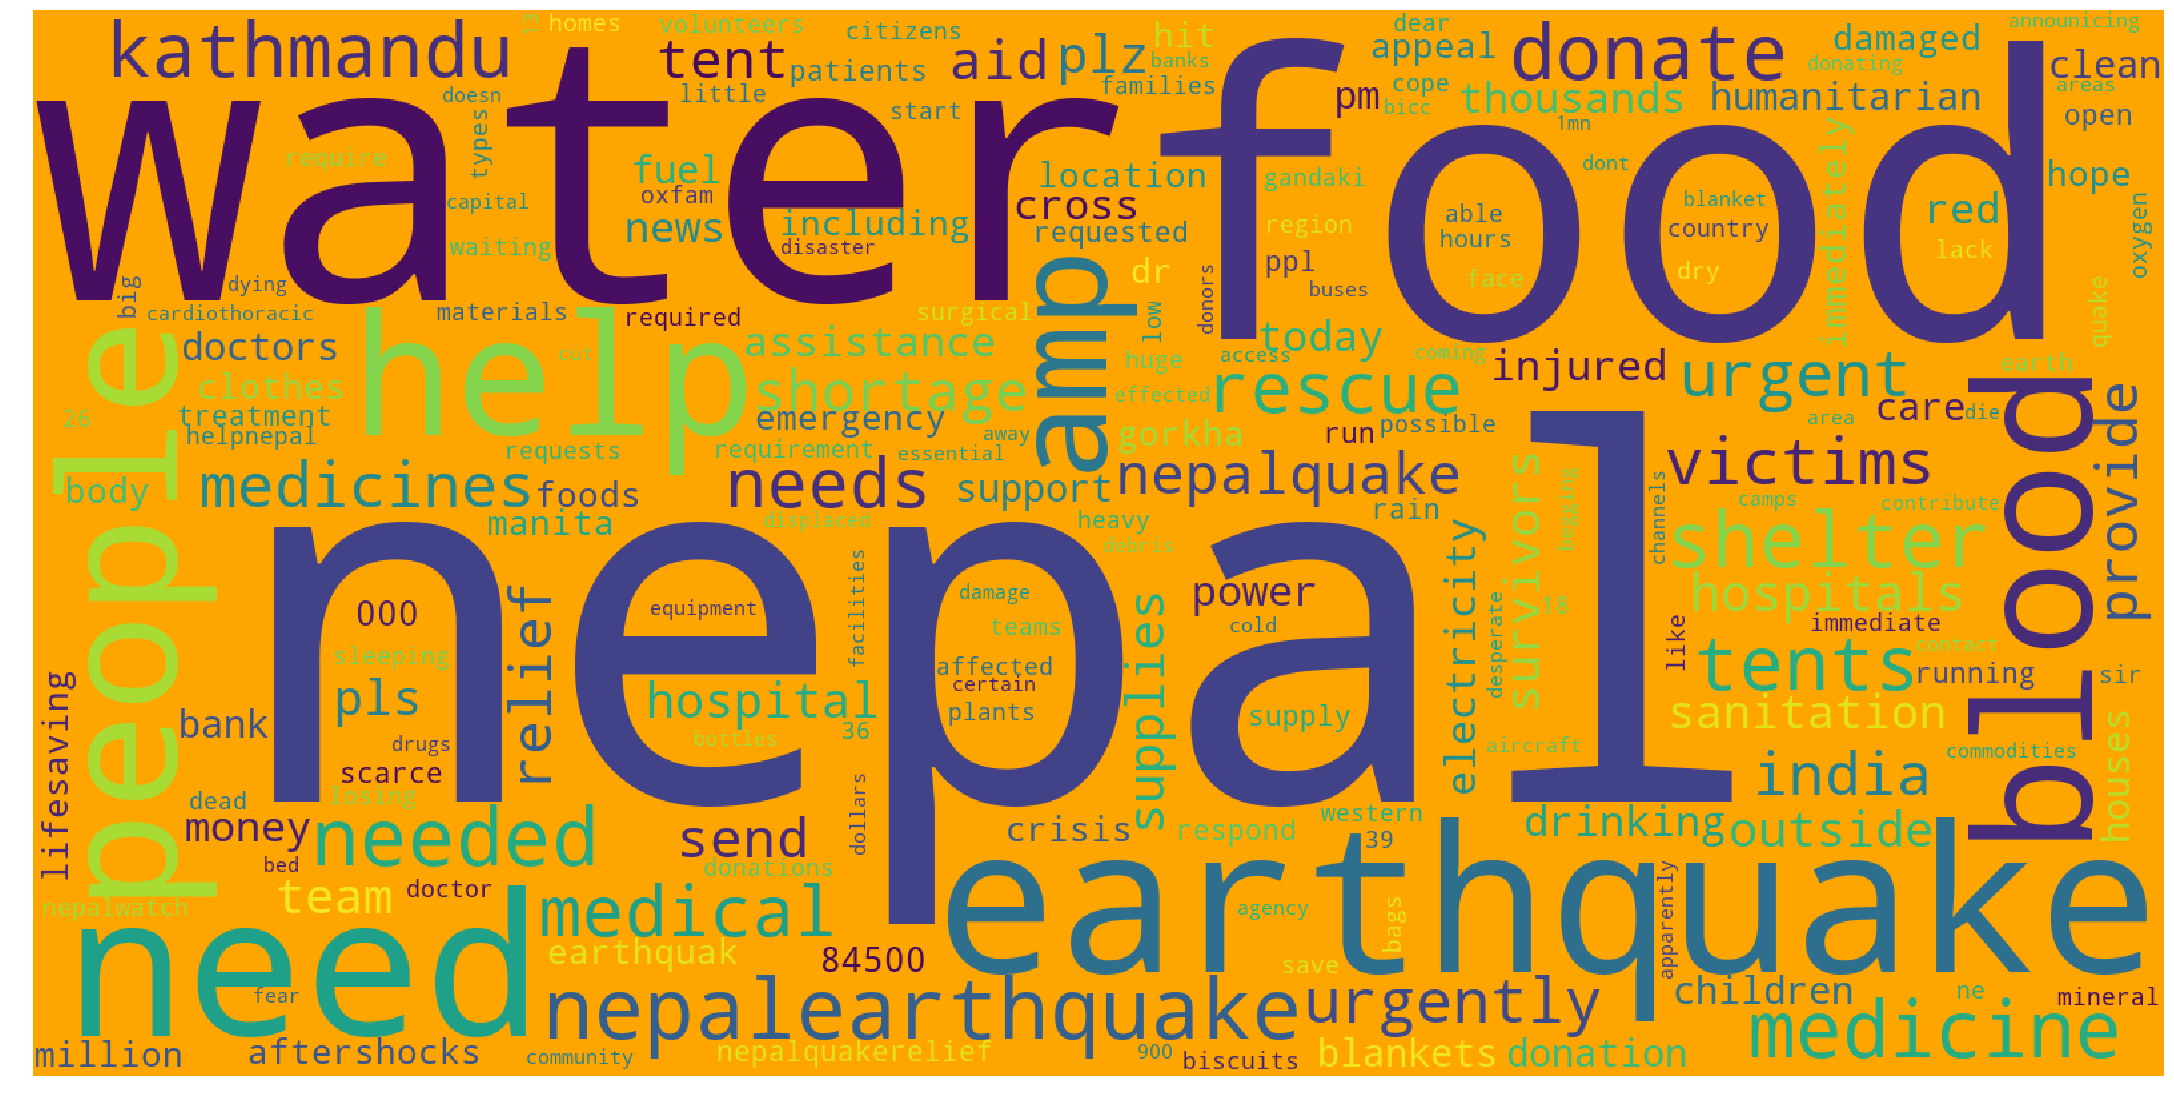

In [171]:
#Generating wordcloud of NEED tweet words
wordcloud=WordCloud(background_color='orange',
                   width=1600,
                   height=800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("need_wordcloud.png")
plt.show()

In [172]:
need_data.head()

,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...


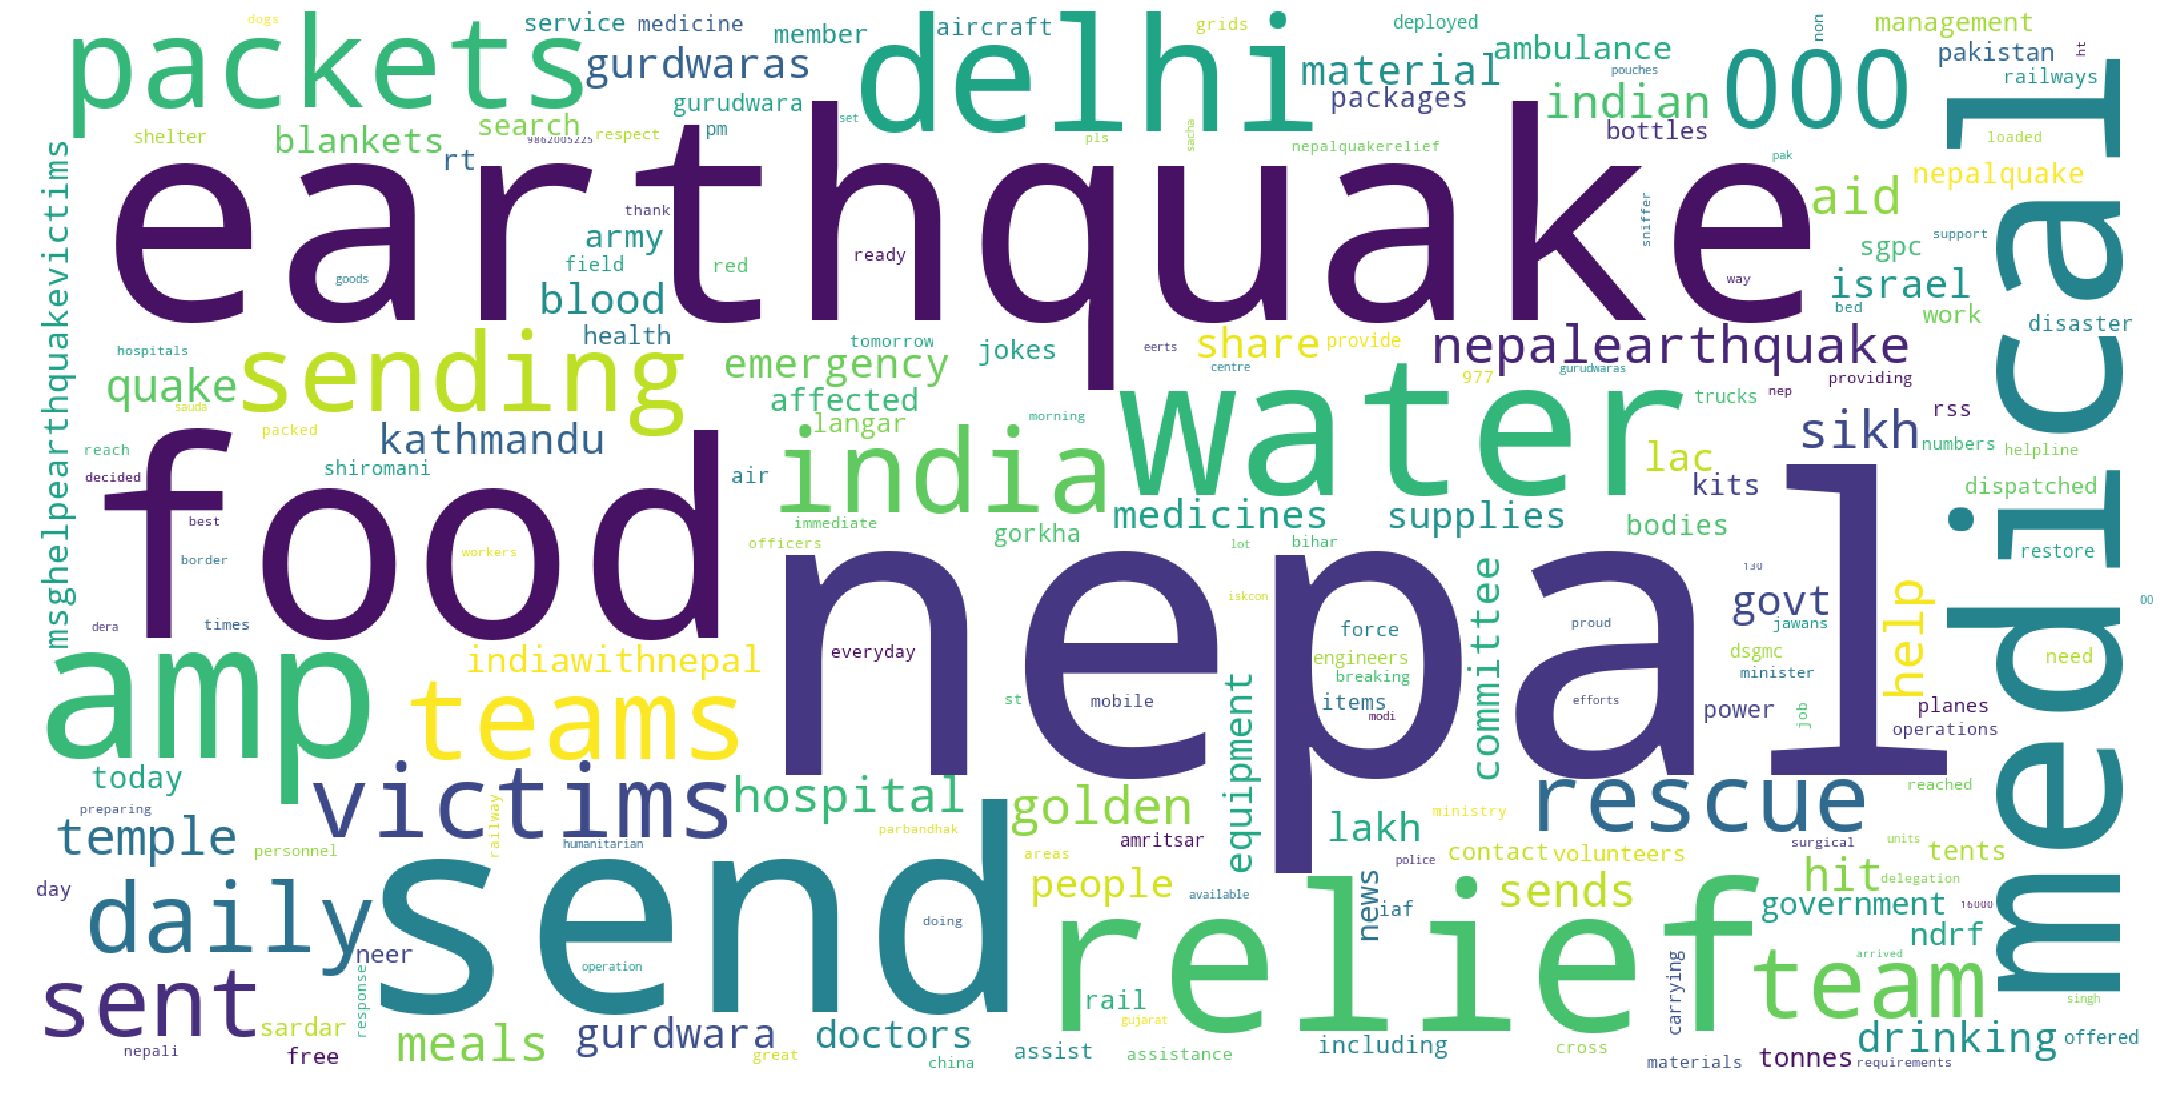

In [173]:
wordcloud=WordCloud(background_color='white',
                   width=1600,
                   height=800).generate_from_frequencies(available_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("available_wordcloud.png")
plt.show()


In [174]:
available_data.head()

,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...


In [175]:
#Splitting the dataset into train and test parts using STRATIFIED SHUFFLE SPLIT technique.

from sklearn.model_selection import train_test_split
tts=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=6,stratify=y)
x_train,x_test,y_train,y_test=tts

In [176]:
vectorizer_train=TfidfVectorizer(lowercase=True)
dtm_train=vectorizer_train.fit_transform(x_train.values.astype('U'))
dtm_test=vectorizer_train.transform(x_test.values.astype('U'))

# Classification of Data
Printing the following for each classification algorithm:
 * Accuracy Score
 * Confusion Matrix
 * Classification Report

In [177]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import datetime
regressor=LogisticRegression()
tick = datetime.datetime.now()
regressor.fit(dtm_train,y_train)
tock = datetime.datetime.now()
lr_train_time = tock - tick
print( lr_train_time)

0:00:00.317627


In [178]:
tick = datetime.datetime.now()
y_pred_lr=regressor.predict(dtm_test)
tock = datetime.datetime.now()
lr_pred_time = tock - tick
print( lr_pred_time)

0:00:00.002685


In [179]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [180]:
score1=accuracy_score(y_test,y_pred_lr)
print(score1)
#Observe accuracy 96.28%.

0.9628884826325411


In [181]:
print(confusion_matrix(y_test,y_pred_lr))

[[5193    1   17]
 [  54    4    2]
 [ 129    0   70]]


In [182]:
print(classification_report(y_test,y_pred_lr))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.80      0.07      0.12        60
          2       0.79      0.35      0.49       199

avg / total       0.96      0.96      0.95      5470



In [183]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
tick = datetime.datetime.now()
knn.fit(dtm_train,y_train)
tock = datetime.datetime.now()
knn_train_time = tock - tick
print( knn_train_time)

0:00:00.007593


In [184]:
tick = datetime.datetime.now()
y_pred_knn=knn.predict(dtm_test)
tock = datetime.datetime.now()
knn_pred_time = tock - tick
print( knn_pred_time)

0:00:04.687199


In [185]:
score2=accuracy_score(y_test,y_pred_knn)
print(score2)
#Observe accuracy 96.58%.

0.9667276051188299


In [186]:
print(confusion_matrix(y_test,y_pred_knn))

[[5154    2   55]
 [  42   16    2]
 [  77    4  118]]


In [187]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.73      0.27      0.39        60
          2       0.67      0.59      0.63       199

avg / total       0.96      0.97      0.96      5470



In [188]:
#Multinomial Naive Bayes'

from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
tick = datetime.datetime.now()
model1.fit(dtm_train, y_train)
tock = datetime.datetime.now()
nb_train_time = tock - tick
print( nb_train_time)

0:00:00.002996


In [189]:
tick = datetime.datetime.now()
y_pred_nvm= model1.predict(dtm_test)
tock = datetime.datetime.now()
nb_pred_time = tock - tick
print( nb_pred_time)

0:00:00.002779


In [190]:
score3=accuracy_score(y_test , y_pred_nvm)
print(score3)
#Observe accuracy 95.33%.

0.953382084095064


In [191]:
print(confusion_matrix(y_test,y_pred_nvm))

[[5208    0    3]
 [  60    0    0]
 [ 192    0    7]]


In [192]:
print(classification_report(y_test,y_pred_nvm))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5211
          1       0.00      0.00      0.00        60
          2       0.70      0.04      0.07       199

avg / total       0.93      0.95      0.93      5470



C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [193]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
model1=SVC(kernel='linear')
tick = datetime.datetime.now()
model1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
svc_train_time = tock - tick
print( svc_train_time)

0:00:07.124962


In [194]:
tick = datetime.datetime.now()
y_pred_svc=model1.predict(dtm_test)
tock = datetime.datetime.now()
svc_pred_time = tock - tick
print( svc_pred_time)

0:00:02.119849


In [195]:
score4=accuracy_score(y_test,y_pred_svc)
print(score4)
#Observe accuracy 97%.

0.970201096892139


In [196]:
print(confusion_matrix(y_test,y_pred_svc))

[[5173    2   36]
 [  41   16    3]
 [  79    2  118]]


In [197]:
print(classification_report(y_test,y_pred_svc))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.80      0.27      0.40        60
          2       0.75      0.59      0.66       199

avg / total       0.97      0.97      0.97      5470



In [198]:
# RBF
model2=SVC(kernel='rbf')
tick = datetime.datetime.now()
model2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
svc2_train_time = tock - tick
print( svc2_train_time)

0:00:04.814491


In [199]:
tick = datetime.datetime.now()
y_pred_svc2=model2.predict(dtm_test)
tock = datetime.datetime.now()
svc2_pred_time = tock - tick
print( svc2_pred_time)

0:00:01.663138


In [200]:
score5=accuracy_score(y_test,y_pred_svc2)
print(score5)
#Observe accuracy 95.2%

0.9526508226691042


In [201]:
print(confusion_matrix(y_test,y_pred_svc2))

[[5211    0    0]
 [  60    0    0]
 [ 199    0    0]]


In [202]:
print(classification_report(y_test,y_pred_svc2))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5211
          1       0.00      0.00      0.00        60
          2       0.00      0.00      0.00       199

avg / total       0.91      0.95      0.93      5470



C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [203]:
#Decision Tree (Gini)
from sklearn.tree import DecisionTreeClassifier
dtc_1=DecisionTreeClassifier(criterion='gini')
tick = datetime.datetime.now()
dtc_1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
dtc1_train_time = tock - tick
print( dtc1_train_time)

0:00:03.408415


In [204]:
tick = datetime.datetime.now()
y_pred_dtc1=dtc_1.predict(dtm_test)
tock = datetime.datetime.now()
dtc1_pred_time = tock - tick
print( dtc1_pred_time)

0:00:00.003642


In [205]:
score6=accuracy_score(y_test,y_pred_dtc1)
print(score6)
#Observe accuracy 96%.

0.959963436928702


In [206]:
print(confusion_matrix(y_test,y_pred_dtc1))

[[5123   26   62]
 [  33   18    9]
 [  78   11  110]]


In [207]:
print(classification_report(y_test,y_pred_dtc1))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5211
          1       0.33      0.30      0.31        60
          2       0.61      0.55      0.58       199

avg / total       0.96      0.96      0.96      5470



In [208]:
# Decision Tree (Entropy)

In [209]:
from sklearn.tree import DecisionTreeClassifier
dtc_2=DecisionTreeClassifier(criterion='entropy')
tick = datetime.datetime.now()
dtc_2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
dtc2_train_time = tock - tick
print( dtc2_train_time)


0:00:01.996514


In [210]:
tick = datetime.datetime.now()
y_pred_dtc2=dtc_2.predict(dtm_test)
tock = datetime.datetime.now()
dtc2_pred_time = tock - tick
print( dtc2_pred_time)

0:00:00.003097


In [211]:
score7=accuracy_score(y_test,y_pred_dtc2)
print(score7)
#Observe accuracy 95.95%.

0.9605118829981718


In [212]:
print(confusion_matrix(y_test,y_pred_dtc2))

[[5120   18   73]
 [  31   22    7]
 [  77   10  112]]


In [213]:
print(classification_report(y_test,y_pred_dtc2))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5211
          1       0.44      0.37      0.40        60
          2       0.58      0.56      0.57       199

avg / total       0.96      0.96      0.96      5470



In [214]:
#Random Forest (Gini)

In [215]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(criterion='gini')
tick = datetime.datetime.now()
rfc_1.fit(dtm_train,y_train)
tock = datetime.datetime.now()
rfc1_train_time = tock - tick
print( rfc1_train_time)

0:00:01.228813


In [216]:
tick = datetime.datetime.now()
y_pred_rfc1=rfc_1.predict(dtm_test)
tock = datetime.datetime.now()
rfc1_pred_time = tock - tick
print( rfc1_pred_time)

0:00:00.072298


In [217]:
score8=accuracy_score(y_test,y_pred_rfc1)
print(score8)
#Observe accuracy 96.23%.

0.963254113345521


In [218]:
print(confusion_matrix(y_test,y_pred_rfc1))

[[5194    1   16]
 [  52    5    3]
 [ 129    0   70]]


In [219]:
print(classification_report(y_test,y_pred_rfc1))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.83      0.08      0.15        60
          2       0.79      0.35      0.49       199

avg / total       0.96      0.96      0.95      5470



In [220]:
#Random Forest (Entropy)

In [221]:
from sklearn.ensemble import RandomForestClassifier
rfc_2=RandomForestClassifier(criterion='entropy')
tick = datetime.datetime.now()
rfc_2.fit(dtm_train,y_train)
tock = datetime.datetime.now()
rfc2_train_time = tock - tick
print( rfc2_train_time)

0:00:01.330722


In [222]:
tick = datetime.datetime.now()
y_pred_rfc2=rfc_2.predict(dtm_test)
tock = datetime.datetime.now()
rfc2_pred_time = tock - tick
print( rfc2_pred_time)

0:00:00.028733


In [223]:
score9=accuracy_score(y_test,y_pred_rfc2)
print(score9)
#Observe accuracy 96.4%.

0.9647166361974406


In [224]:
print(confusion_matrix(y_test,y_pred_rfc2))

[[5202    1    8]
 [  50   10    0]
 [ 134    0   65]]


In [225]:
print(classification_report(y_test,y_pred_rfc2))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.91      0.17      0.28        60
          2       0.89      0.33      0.48       199

avg / total       0.96      0.96      0.96      5470



# Conclusion

* Accuracy

* Time to train the Model

* Time To Predict

* Accuracy-Time Ratio( Train)

* Accuracy-Time Ratio( Test)

In [226]:
import pandas as pd
import seaborn as sns

Accuracy = [score1,score2,score3,score4,score5,score6,score7,score8,score9]  


Train_time = [lr_train_time,knn_train_time,nb_train_time,svc_train_time,svc2_train_time,dtc1_train_time,dtc2_train_time,rfc1_train_time,rfc2_train_time]
pred_test_time = [lr_pred_time,knn_pred_time,nb_pred_time,svc_pred_time,svc2_pred_time,dtc1_pred_time,dtc2_pred_time,rfc1_pred_time,rfc2_pred_time]

data = { 'Accuracy' : Accuracy,
         'Train_Time': Train_time,
         'Prediction': pred_test_time,
         'Algorithm': ['Logistic Regression','KNeighbors',"Naive Baye's",'SVM linear','SVM rbf',"Decision Tree(gini)",
                       'Decision Tree(entropy)','Random Forest Classifier(gini)','Random Forest Classifier(entropy)']}

df = pd.DataFrame( data)

In [227]:
# Comparison based on Accuracy

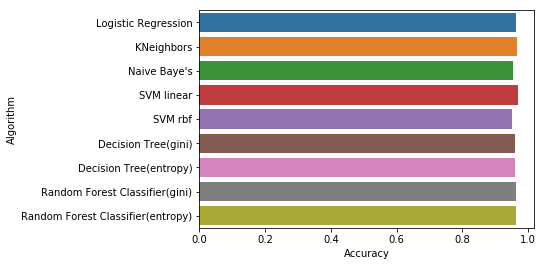

In [228]:
sns.barplot(x = df.Accuracy, y = df.Algorithm)

In [229]:
# Comparison based on Training Time

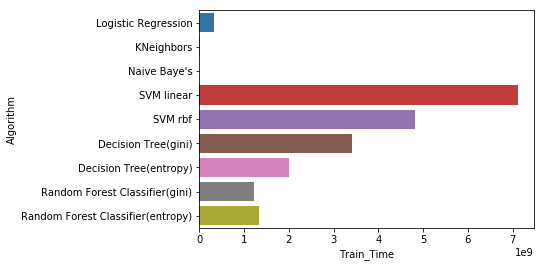

In [230]:
sns.barplot(x = df.Train_Time, y = df.Algorithm)

In [231]:
# Comparison based on Prediction Time

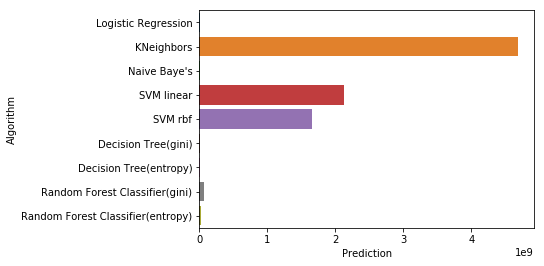

In [232]:
sns.barplot(x = df.Prediction, y = df.Algorithm)